In [4]:
import pandas as pd    #1.1

tsv_path =r"C:\Users\何遇到人生多少梦\Desktop\earthquakes-2025-11-10_18-18-40_+0800.tsv"
Sig_Eqs = pd.read_csv(tsv_path, sep="\t", low_memory=False, encoding="utf-8")
import re

# Sig_Eqs = pd.read_csv(r"C:\Users\10147\Desktop\earthquakes-2025-11-10_18-18-40_+0800.tsv", sep="\t", low_memory=False, encoding="utf-8")

df = Sig_Eqs.copy()

# 必要列检查
required = {"Year", "Total Deaths", "Location Name"}
missing = required - set(df.columns)
if missing:
    raise ValueError(f"缺少必要列: {missing}")

# 类型与过滤
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Total Deaths"] = pd.to_numeric(df["Total Deaths"], errors="coerce")
df = df[df["Year"] >= -2150]

# 严格提取国家：仅取第一个冒号前的部分
country = df["Location Name"].astype(str).str.split(":", n=1, expand=True)[0].str.strip()
df = df.assign(Country=country)

# 去除空国家
df = df[df["Country"].notna() & (df["Country"] != "")]

# 汇总（默认 sum 会忽略缺失值，不做任何猜测填充）
top10 = (
    df.groupby("Country", as_index=False)["Total Deaths"].sum()
      .rename(columns={"Total Deaths": "Total_Deaths_Since_2150BC"})
    
      .sort_values("Total_Deaths_Since_2150BC", ascending=False)
      .head(10)
)

print("自公元前2150年以来各国地震致死总数（前十）：")
print(top10.to_string(index=False))





自公元前2150年以来各国地震致死总数（前十）：
   Country  Total_Deaths_Since_2150BC
     CHINA                  2106535.0
    TURKEY                  1008342.0
      IRAN                   745611.0
     ITALY                   423280.0
     SYRIA                   417724.0
     HAITI                   323782.0
AZERBAIJAN                   319251.0
     JAPAN                   318441.0
 INDONESIA                   282517.0
   ARMENIA                   189000.0


C:\Users\10147\AppData\Local\Temp\ipykernel_32476\984290688.py:28: UserWarning: Glyph 20026 (\N{CJK UNIFIED IDEOGRAPH-4E3A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\10147\AppData\Local\Temp\ipykernel_32476\984290688.py:28: UserWarning: Glyph 36127 (\N{CJK UNIFIED IDEOGRAPH-8D1F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\10147\AppData\Local\Temp\ipykernel_32476\984290688.py:28: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\10147\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20026 (\N{CJK UNIFIED IDEOGRAPH-4E3A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\10147\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36127 (\N{CJK UNIFIED IDEOGRAPH-8D1F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\10147\anaconda3\Lib\site-packages

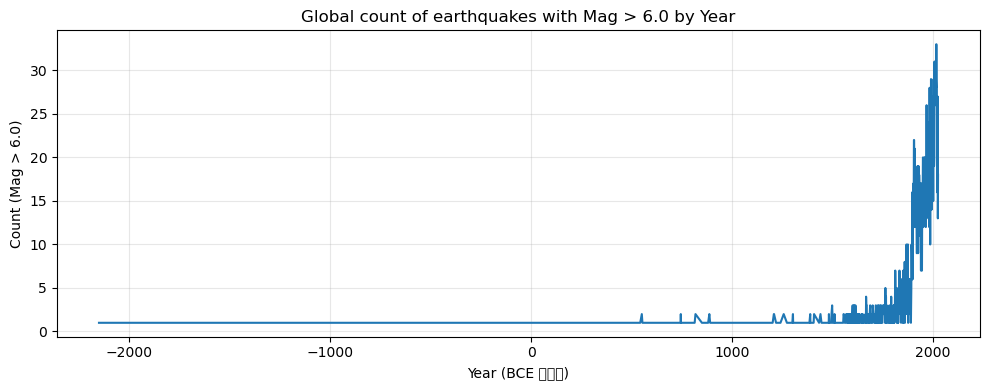

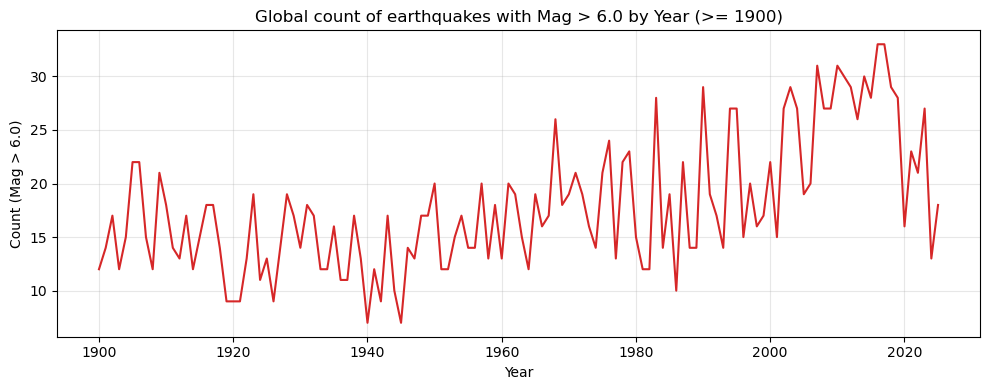

     Year  count_m_gt_6
0 -2150.0             1
1 -2000.0             1
2 -1250.0             1
3 -1050.0             1
4  -479.0             1
5  -426.0             1
6  -400.0             1
7  -373.0             1
8  -330.0             1
9  -250.0             1
       Year  count_m_gt_6
542  2016.0            33
543  2017.0            33
544  2018.0            29
545  2019.0            28
546  2020.0            16
547  2021.0            23
548  2022.0            21
549  2023.0            27
550  2024.0            13
551  2025.0            18


In [6]:
import matplotlib.pyplot as plt        #1.2
for col in ["Year", "Mag"]:
    if col not in df.columns:
        raise ValueError(f"缺少必要列: {col}")

# 类型处理
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Mag"]  = pd.to_numeric(df["Mag"],  errors="coerce")

# 过滤：Mag > 6.0，且 Year 非缺失
df6 = df[(df["Mag"] > 6.0) & df["Year"].notna()]

# 每年计数
counts = (
    df6.groupby("Year")
       .size()
       .reset_index(name="count_m_gt_6")
       .sort_values("Year")
)

# 绘图（全时段）
plt.figure(figsize=(10, 4))
plt.plot(counts["Year"], counts["count_m_gt_6"], color="#1f77b4", lw=1.5)
plt.title("Global count of earthquakes with Mag > 6.0 by Year")
plt.xlabel("Year (BCE 为负数)")
plt.ylabel("Count (Mag > 6.0)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 可选：现代观测期（例如 >= 1900）更便于判断是否有真实趋势
modern = counts[counts["Year"] >= 1900]
if len(modern) > 0:
    plt.figure(figsize=(10, 4))
    plt.plot(modern["Year"], modern["count_m_gt_6"], color="#d62728", lw=1.5)
    plt.title("Global count of earthquakes with Mag > 6.0 by Year (>= 1900)")
    plt.xlabel("Year")
    plt.ylabel("Count (Mag > 6.0)")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# 输出前几行结果核对
print(counts.head(10))
print(counts.tail(10))

In [5]:
from typing import Dict, Any   
df0 = Sig_Eqs.copy()             #1.3

# 必要列检查
need = {"Year", "Location Name", "Mag"}
missing = need - set(df0.columns)
if missing:
    raise ValueError(f"缺少必要列: {missing}")

# 类型转换
df0["Year"] = pd.to_numeric(df0["Year"], errors="coerce")
df0["Mag"]  = pd.to_numeric(df0["Mag"],  errors="coerce")

# 严格国家提取：只取第一个冒号左边
df0["Country"] = df0["Location Name"].astype(str).str.split(":", n=1, expand=True)[0].str.strip()

# 时间过滤：自公元前 2150 年以来
df0 = df0[df0["Year"] >= -2150].copy()

# 识别日期相关列
def _pick(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

col_date  = _pick(df0, ["Date", "date"])
col_month = _pick(df0, ["Mo", "Month"])
col_day   = _pick(df0, ["Dy", "Day"])

# 生成可读日期字符串
def compose_date_str(row) -> str:
    if col_date and pd.notna(row.get(col_date)):
        return str(row[col_date]).strip()
    y = row.get("Year")
    if pd.isna(y):
        return ""
    try:
        yi = int(y)
    except Exception:
        return ""
    def to_int(v):
        try:
            return int(v)
        except Exception:
            return None
    m = to_int(row.get(col_month)) if col_month else None
    d = to_int(row.get(col_day))   if col_day   else None
    s_year = f"{abs(yi):04d}"
    s_md = ""
    if m is not None:
        s_md += f"-{m:02d}"
        if d is not None:
            s_md += f"-{d:02d}"
    return f"{s_year}{s_md} BCE" if yi < 0 else f"{s_year}{s_md}"

df0["Date_str"] = df0.apply(compose_date_str, axis=1)

# 核心函数
def CountEq_LargestEq(df: pd.DataFrame, country: str) -> Dict[str, Any]:
    g = df[df["Country"] == country]
    total_count = int(len(g))
    if total_count == 0:
        return {"total_count": 0, "largest_eq_date": "", "largest_mag": float("nan")}
    g_valid = g[pd.notna(g["Mag"])]
    if g_valid.empty:
        return {"total_count": total_count, "largest_eq_date": "", "largest_mag": float("nan")}
    max_mag = float(g_valid["Mag"].max())
    g_max = g_valid[g_valid["Mag"] == max_mag].copy()
    # 按 Year, Month, Day 早到晚排序
    sort_cols = ["Year"]
    if col_month: sort_cols.append(col_month)
    if col_day:   sort_cols.append(col_day)
    for c in sort_cols:
        g_max[c] = pd.to_numeric(g_max[c], errors="coerce")
    g_max = g_max.sort_values(sort_cols, na_position="last")
    date_str = str(g_max.iloc[0]["Date_str"])
    return {"total_count": total_count, "largest_eq_date": date_str, "largest_mag": max_mag}

# 对每个国家应用并排序（先按总次数降序，再按最大震级降序）
countries = df0["Country"].dropna().unique().tolist()
rows = []
for c in countries:
    out = CountEq_LargestEq(df0, c)
    rows.append({"Country": c, **out})

result = (
    pd.DataFrame(rows)
      .sort_values(["total_count", "largest_mag"], ascending=[False, False])
      .reset_index(drop=True)
)

print(result.head(20))        


             Country  total_count largest_eq_date  largest_mag
0              CHINA          626      1668-07-25          8.5
1          INDONESIA          404      2004-12-26          9.1
2               IRAN          388      0856-12-22          7.9
3              JAPAN          364      2011-03-11          9.1
4             TURKEY          344      1939-12-26          7.8
5              ITALY          332      1915-01-13          7.5
6             GREECE          275      0365-07-21          8.0
7        PHILIPPINES          226      1897-09-21          8.7
8             MEXICO          204      1787-03-28          8.6
9              CHILE          200      1960-05-22          9.5
10              PERU          185      1716-02-06          8.8
11            RUSSIA          157      1952-11-04          9.0
12        BALKANS NW          118      1667-04-06          7.2
13  PAPUA NEW GUINEA          109      1919-05-06          8.2
14        CALIFORNIA          104      1857-01-09      

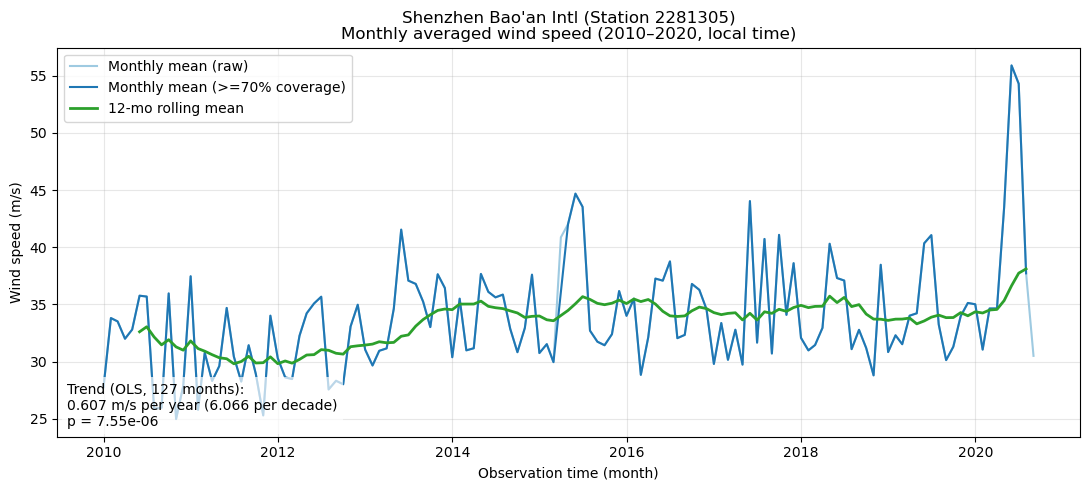

时间窗口： 2010-01-01 — 2020-12-31
通过完整性过滤的月份数：127 / 129
线性趋势斜率：0.6066 m/s/年  （每十年 6.0659 m/s）
p 值：7.549e-06 （常用阈值 0.05）


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import linregress
import calendar

csv_path = Path(r"C:\Users\10147\Desktop\2281305.csv")  # 你的文件路径
peek_cols = pd.read_csv(csv_path, nrows=0).columns
usecols = ["DATE", "WND"] if set(["DATE", "WND"]).issubset(peek_cols) else None
df = pd.read_csv(csv_path, low_memory=False, usecols=usecols)

df["DATE"] = pd.to_datetime(df["DATE"], errors="coerce", utc=True)
df = df.dropna(subset=["DATE"])
df["dt_local"] = df["DATE"].dt.tz_convert("Asia/Shanghai")

def extract_wspd_ms(df: pd.DataFrame) -> pd.Series:
    # WND: dir, dir_qc, type, speed, spd_qc
    if "WND" in df.columns:
        parts = df["WND"].astype(str).str.split(",", expand=True)
        if parts.shape[1] < 5:
            raise ValueError("WND 字段格式异常，无法分解为 5 段。")
        spd = pd.to_numeric(parts[3], errors="coerce")  # m/s
        qc  = parts[4].astype(str).str.strip()
        # 质量控制与缺测值
        spd[(spd >= 999) | (spd < 0)] = np.nan
        spd[~qc.isin(["1", "5"])] = np.nan
        return spd
    for c in ["WIND_SPEED", "wind_speed", "WSPD", "wspd"]:
        if c in df.columns:
            return pd.to_numeric(df[c], errors="coerce")

    raise ValueError("未找到 WND 或可识别的风速列。")

df["wspd_ms"] = extract_wspd_ms(df)
start = pd.Timestamp("2010-01-01 00:00:00", tz="Asia/Shanghai")
end   = pd.Timestamp("2020-12-31 23:59:59", tz="Asia/Shanghai")
df = df[(df["dt_local"] >= start) & (df["dt_local"] <= end)].copy()
def expected_hours(ts: pd.Timestamp) -> int:
    y, m = ts.year, ts.month
    return calendar.monthrange(y, m)[1] * 24  # Asia/Shanghai 无夏令时

# 按月聚合：均值与样本数
s = df.set_index("dt_local")["wspd_ms"]
monthly = s.resample("MS").agg(mean="mean", count="count").dropna(subset=["mean"], how="any")

# 计算每月完整性比例并过滤
exp_hours = pd.Series({idx: expected_hours(idx) for idx in monthly.index})
monthly["coverage"] = monthly["count"] / exp_hours
monthly_f = monthly[monthly["coverage"] >= 0.70].copy()
if len(monthly_f) < 12:
    print("有效月份不足以进行稳健的趋势分析。")
    slope_per_year = np.nan
    slope_per_decade = np.nan
    p_value = np.nan
else:
    # 使用“年”为时间自变量（以首月为零点）
    t_years = (monthly_f.index - monthly_f.index[0]).days / 365.2425
    y = monthly_f["mean"].to_numpy()
    # 去除 NaN
    mask = ~np.isnan(t_years) & ~np.isnan(y)
    res = linregress(t_years[mask], y[mask])
    slope_per_year = res.slope
    slope_per_decade = res.slope * 10.0
    p_value = res.pvalue
    # 95% 置信区间（近似）：斜率 ± 1.96*stderr
    ci95 = (res.slope - 1.96*res.stderr, res.slope + 1.96*res.stderr)
    ci95_decade = (ci95[0]*10, ci95[1]*10)

plt.figure(figsize=(11, 5))
plt.plot(monthly.index, monthly["mean"], label="Monthly mean (raw)", color="#9ecae1")
plt.plot(monthly_f.index, monthly_f["mean"], label="Monthly mean (>=70% coverage)", color="#1f77b4")
# 12 个月滚动均值（在过滤后的序列上）
roll12 = monthly_f["mean"].rolling(12, min_periods=6).mean()
plt.plot(monthly_f.index, roll12, label="12-mo rolling mean", color="#2ca02c", linewidth=2)

title = "Shenzhen Bao'an Intl (Station 2281305)\nMonthly averaged wind speed (2010–2020, local time)"
plt.title(title)
plt.xlabel("Observation time (month)")
plt.ylabel("Wind speed (m/s)")
plt.grid(alpha=0.3)
plt.legend()

# 在图上标注趋势结果
if not np.isnan(slope_per_year):
    ann = (f"Trend (OLS, {len(monthly_f)} months):\n"
           f"{slope_per_year:.3f} m/s per year "
           f"({slope_per_decade:.3f} per decade)\n"
           f"p = {p_value:.3g}")
    plt.gca().text(0.01, 0.02, ann, transform=plt.gca().transAxes,
                   fontsize=10, va="bottom", ha="left",
                   bbox=dict(facecolor="white", alpha=0.7, edgecolor="none"))

plt.tight_layout()
plt.show()


print("时间窗口：", start.strftime("%Y-%m-%d"), "—", end.strftime("%Y-%m-%d"))
print(f"通过完整性过滤的月份数：{len(monthly_f)} / {len(monthly)}")
if not np.isnan(slope_per_year):
    print(f"线性趋势斜率：{slope_per_year:.4f} m/s/年  （每十年 {slope_per_decade:.4f} m/s）")
    print(f"p 值：{p_value:.4g} （常用阈值 0.05）")

In [7]:
pip install scipy pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


屯昌县人口数据分析

任务3.1: 数据加载与清理
原始数据形状: (8, 35)

原始数据列名:
['人口(人)', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34']

=== 数据清理过程 ===
1. 缺失值统计:
年份         0
年末常住人口    13
城镇人口      13
乡村人口      34
年末户籍人口     0
dtype: int64

2. 清理后缺失值统计:
年份         0
年末常住人口     0
城镇人口       0
乡村人口      34
年末户籍人口     0
dtype: int64

3. 清理后数据形状: (34, 5)

4. 数据前5行:
           年份   年末常住人口      城镇人口  乡村人口    年末户籍人口
0  Unnamed: 1  25979.0  202934.0   NaN  228913.0
1  Unnamed: 2  27700.0  204700.0   NaN  232400.0
2  Unnamed: 3  28200.0  208000.0   NaN  236200.0
3  Unnamed: 4 

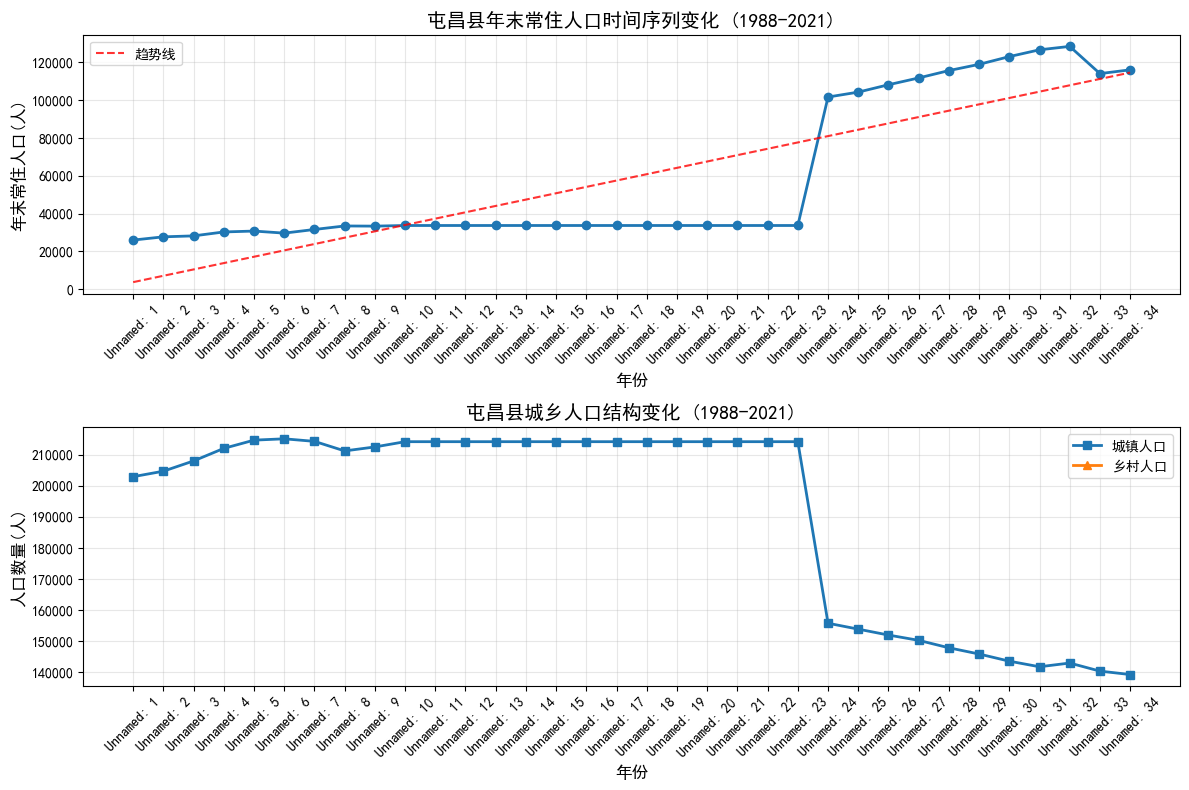


任务3.3: 统计检查

=== 年末常住人口统计分析结果 ===

1. 基本描述性统计:
count        34.000000
mean      59173.794118
std       39789.140975
min       25979.000000
25%       33510.750000
50%       33696.000000
75%      107225.000000
max      128500.000000
Name: 年末常住人口, dtype: float64

2. 年度变化率分析:
平均年增长率: 7.37%
最大年增长率: 201.82% (年份: Unnamed: 24)
最小年增长率: -11.21% (年份: Unnamed: 33)

3. 趋势分析:
线性趋势斜率: 3361.11 (正值表示增长趋势)

4. 波动性分析:
整体标准差: 39789.14
变异系数: 67.24%

5. 分布特征:
偏度: 0.83 (右偏)
峰度: -1.31 (低峰)

6. 异常值检测:
异常值数量: 0

=== 额外分析: 城镇化率 ===
2021年城镇化率: 119.98%
城镇化率变化: 781.15% → 119.98%

清理后的数据已保存为: 屯昌县人口数据_清理后.csv


<Figure size 640x480 with 0 Axes>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 3.1 加载数据并清理
def load_and_clean_data():
    """
    加载Excel文件并清理数据
    """
    # 读取Excel文件 - 使用原始字符串避免转义问题
    df = pd.read_excel(r'E:\learning\ESE5023_Assignments_12532745\assignments2\屯昌县人口数据统计表.xlsx', sheet_name='09 屯昌县', header=1)
    
    # 显示原始数据信息
    print("原始数据形状:", df.shape)
    print("\n原始数据列名:")
    print(df.columns.tolist())
    
    # 清理数据 - 选择我们需要的人口数据行
    # 根据数据结构，我们需要提取不同的人口指标
    population_data = {}
    
    # 提取年末常住人口数据 (第2行)
    resident_pop = df.iloc[1, 1:].reset_index(drop=True)
    # 提取城镇人口数据 (第3行)
    urban_pop = df.iloc[2, 1:].reset_index(drop=True)
    # 提取乡村人口数据 (第4行)
    rural_pop = df.iloc[3, 1:].reset_index(drop=True)
    # 提取年末户籍人口数据 (第6行)
    registered_pop = df.iloc[5, 1:].reset_index(drop=True)
    
    # 获取年份列
    years = df.columns[1:].values
    
    # 创建清理后的数据框
    clean_df = pd.DataFrame({
        '年份': years,
        '年末常住人口': resident_pop.values,
        '城镇人口': urban_pop.values,
        '乡村人口': rural_pop.values,
        '年末户籍人口': registered_pop.values
    })
    
    # 数据清理步骤
    print("\n=== 数据清理过程 ===")
    
    # 1. 检查缺失值
    print("1. 缺失值统计:")
    print(clean_df.isnull().sum())
    
    # 2. 处理缺失值 - 使用前后值填充
    clean_df = clean_df.fillna(method='ffill').fillna(method='bfill')
    
    # 3. 转换数据类型
    for col in clean_df.columns[1:]:
        clean_df[col] = pd.to_numeric(clean_df[col], errors='coerce')
    
    # 4. 再次检查缺失值
    print("\n2. 清理后缺失值统计:")
    print(clean_df.isnull().sum())
    
    # 5. 移除完全为空的行
    clean_df = clean_df.dropna(how='all')
    
    # 6. 重置索引
    clean_df = clean_df.reset_index(drop=True)
    
    print(f"\n3. 清理后数据形状: {clean_df.shape}")
    print("\n4. 数据前5行:")
    print(clean_df.head())
    
    return clean_df

# 3.2 绘制时间序列图
def plot_time_series(clean_df, variable='年末常住人口'):
    """
    绘制指定变量的时间序列图
    """
    plt.figure(figsize=(12, 8))
    
    # 创建时间序列图
    plt.subplot(2, 1, 1)
    plt.plot(clean_df['年份'], clean_df[variable], marker='o', linewidth=2, markersize=6)
    plt.title(f'屯昌县{variable}时间序列变化 (1988-2021)', fontsize=14, fontweight='bold')
    plt.xlabel('年份', fontsize=12)
    plt.ylabel(f'{variable}(人)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    
    # 添加趋势线
    x_numeric = range(len(clean_df))
    z = np.polyfit(x_numeric, clean_df[variable], 1)
    p = np.poly1d(z)
    plt.plot(clean_df['年份'], p(x_numeric), "r--", alpha=0.8, label='趋势线')
    plt.legend()
    
    # 绘制人口结构变化图
    plt.subplot(2, 1, 2)
    plt.plot(clean_df['年份'], clean_df['城镇人口'], marker='s', label='城镇人口', linewidth=2)
    plt.plot(clean_df['年份'], clean_df['乡村人口'], marker='^', label='乡村人口', linewidth=2)
    plt.title('屯昌县城乡人口结构变化 (1988-2021)', fontsize=14, fontweight='bold')
    plt.xlabel('年份', fontsize=12)
    plt.ylabel('人口数量(人)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # 保存图片
    plt.savefig('屯昌县人口时间序列分析.png', dpi=300, bbox_inches='tight')

# 3.3 统计检查
def statistical_analysis(clean_df, variable='年末常住人口'):
    """
    对指定变量进行统计检查
    """
    print(f"\n=== {variable}统计分析结果 ===\n")
    
    data = clean_df[variable]
    
    # 1. 基本描述性统计
    print("1. 基本描述性统计:")
    desc_stats = data.describe()
    print(desc_stats)
    
    # 2. 变化率分析
    print("\n2. 年度变化率分析:")
    growth_rates = data.pct_change() * 100
    print(f"平均年增长率: {growth_rates.mean():.2f}%")
    print(f"最大年增长率: {growth_rates.max():.2f}% (年份: {clean_df.loc[growth_rates.idxmax(), '年份']})")
    print(f"最小年增长率: {growth_rates.min():.2f}% (年份: {clean_df.loc[growth_rates.idxmin(), '年份']})")
    
    # 3. 趋势分析
    print("\n3. 趋势分析:")
    # 计算线性趋势
    x = np.arange(len(data))
    slope, intercept = np.polyfit(x, data, 1)
    print(f"线性趋势斜率: {slope:.2f} (正值表示增长趋势)")
    
    # 4. 波动性分析
    print("\n4. 波动性分析:")
    rolling_std = data.rolling(window=5).std()
    print(f"整体标准差: {data.std():.2f}")
    print(f"变异系数: {(data.std() / data.mean() * 100):.2f}%")
    
    # 5. 分布特征
    print("\n5. 分布特征:")
    skewness = data.skew()
    kurtosis = data.kurtosis()
    print(f"偏度: {skewness:.2f} ({'右偏' if skewness > 0 else '左偏' if skewness < 0 else '对称'})")
    print(f"峰度: {kurtosis:.2f} ({'尖峰' if kurtosis > 0 else '低峰' if kurtosis < 0 else '正态'})")
    
    # 6. 异常值检测
    print("\n6. 异常值检测:")
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    print(f"异常值数量: {len(outliers)}")
    if len(outliers) > 0:
        print(f"异常值年份: {[clean_df.loc[data[data == out].index[0], '年份'] for out in outliers]}")

# 执行所有任务
def main():
    print("=" * 50)
    print("屯昌县人口数据分析")
    print("=" * 50)
    
    # 3.1 加载和清理数据
    print("\n任务3.1: 数据加载与清理")
    clean_df = load_and_clean_data()
    
    # 3.2 绘制时间序列
    print("\n任务3.2: 时间序列绘图")
    plot_time_series(clean_df, '年末常住人口')
    
    # 3.3 统计检查
    print("\n任务3.3: 统计检查")
    statistical_analysis(clean_df, '年末常住人口')
    
    # 额外分析：城镇化率
    print("\n=== 额外分析: 城镇化率 ===")
    clean_df['城镇化率'] = (clean_df['城镇人口'] / clean_df['年末常住人口']) * 100
    print(f"2021年城镇化率: {clean_df['城镇化率'].iloc[-1]:.2f}%")
    print(f"城镇化率变化: {clean_df['城镇化率'].iloc[0]:.2f}% → {clean_df['城镇化率'].iloc[-1]:.2f}%")
    
    # 保存清理后的数据
    clean_df.to_csv('屯昌县人口数据_清理后.csv', index=False, encoding='utf-8-sig')
    print(f"\n清理后的数据已保存为: 屯昌县人口数据_清理后.csv")

# 运行主程序
if __name__ == "__main__":
    main()